# Kaggle graduate admissions

Graduate Admissions -- Predicting admission from important parameters

[Kaggle Dataset](https://www.kaggle.com/mohansacharya/graduate-admissions)

Columns

 - GRE: Graduate Record Examination
 - TOEFL: Test of English as a Foreign Language
 - University Rating
 - SOP
 - LOR
 - CGPA
 - Research
 - Chance of Admit

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Figures within my notebook
%matplotlib inline

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

### Loading data

In [2]:
file = '../data/admission_predict_ver1.1.csv'
df = pd.read_csv(file).drop(['Serial No.'], axis=1)

### Initial understanding

In [3]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [4]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [40]:
df.Research.value_counts()

1    280
0    220
Name: Research, dtype: int64

[//]: <> (`Research` is weekly correlated to all the other features. We may very well avoid using such feature. `Research` is also negatively corelated to `LOR`. On the other hand `GRE` and `CGPA` seems to have a strong correlation with each other and with `Chance of Admit`.)

## Time to print

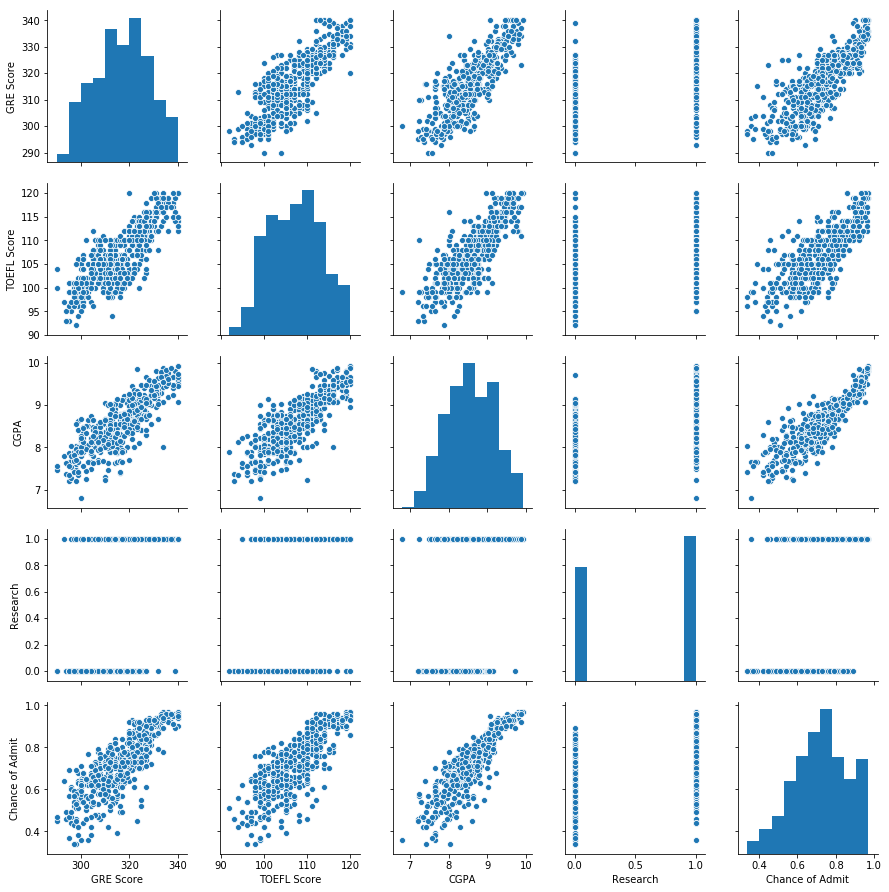

In [42]:
sns.pairplot(df[['GRE Score', 'TOEFL Score', 'CGPA', 'Research', 'Chance of Admit']])

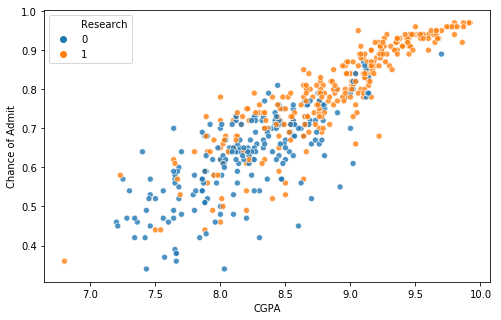

In [55]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="CGPA", y="Chance of Admit", data=df, hue="Research", alpha=0.8)

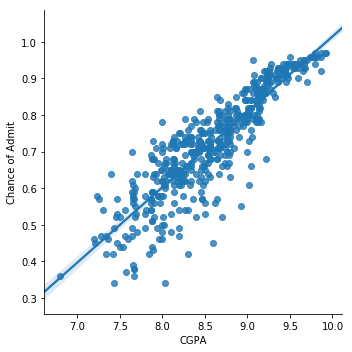

In [59]:
sns.lmplot(x="CGPA", y="Chance of Admit", data=df)

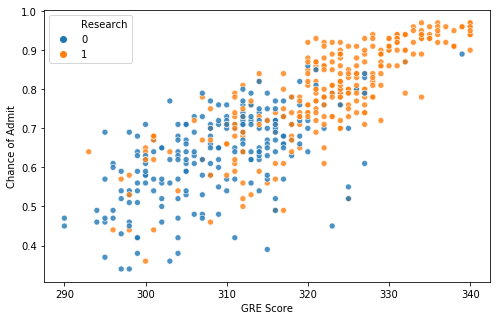

In [60]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="GRE Score", y="Chance of Admit", data=df, hue="Research", alpha=0.8)

 > What if we wanted to turn it into a classification problem?

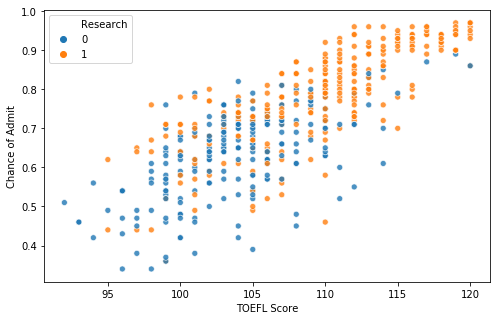

In [61]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="TOEFL Score", y="Chance of Admit", data=df, hue="Research", alpha=0.8)

## Learning Problem

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

### Regression

In [69]:
from sklearn.linear_model import LinearRegression

In [65]:
X = df[['GRE Score', 'TOEFL Score', 'CGPA', 'Research']]
y = df['Chance of Admit']

In [66]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

In [70]:
lrmodel = LinearRegression()

In [83]:
scores = cross_validate(lrmodel, X_train, y_train, cv=10, return_train_score=False, return_estimator=True)

In [84]:
scores

{'fit_time': array([0.00757289, 0.0009973 , 0.00099635, 0.00297427, 0.00199389,
        0.00216126, 0.00210047, 0.00611758, 0.00343919, 0.00244784]),
 'score_time': array([0.0012207 , 0.00298858, 0.00334978, 0.00099778, 0.00100327,
        0.00102592, 0.        , 0.00125599, 0.00151777, 0.        ]),
 'estimator': (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  LinearRegression(copy_X=T